In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
libor_all_tenors = pd.read_csv('libor-rates.csv', usecols=['Tenor', 'Value', 'Date'], \
                                parse_dates=['Date'], dayfirst = True)
libor_all_tenors

,Tenor,Value,Date
0,Overnight,0.46813,2014-11-03
1,1 Week,0.47938,2014-11-03
2,1 Month,0.50663,2014-11-03
3,2 Month,0.52900,2014-11-03
4,3 Month,0.55475,2014-11-03
...,...,...,...
11244,1 Month,0.05013,2021-03-16
11245,2 Month,0.06388,2021-03-16
11246,3 Month,0.07800,2021-03-16
11247,6 Month,0.10113,2021-03-16


<AxesSubplot:xlabel='Date', ylabel='Value'>

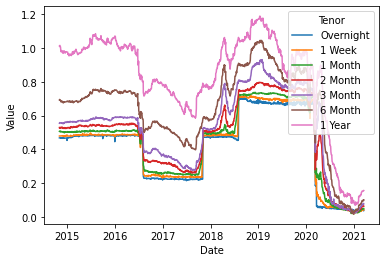

In [3]:
sns.lineplot(data=libor_all_tenors, x="Date", y="Value", hue="Tenor")

In [4]:
libor_wide = libor_all_tenors.pivot_table(index="Date",columns="Tenor",values="Value")
libor_wide

Tenor,1 Month,1 Week,1 Year,2 Month,3 Month,6 Month,Overnight
Date,,,,,,,
2014-11-03,0.50663,0.47938,1.01213,0.52900,0.55475,0.69275,0.46813
2014-11-04,0.50788,0.47938,1.01369,0.52900,0.55738,0.69531,0.46813
2014-11-05,0.50788,0.47938,1.01338,0.52650,0.55838,0.69375,0.46750
2014-11-06,0.50850,0.48000,1.01463,0.52963,0.55838,0.69375,0.46813
2014-11-07,0.50663,0.48000,1.01463,0.52838,0.55713,0.69219,0.46813
...,...,...,...,...,...,...,...
2021-03-10,0.04738,0.04613,0.15400,0.06288,0.07725,0.09563,0.04025
2021-03-11,0.04775,0.04588,0.15313,0.06463,0.07875,0.09963,0.04025
2021-03-12,0.05050,0.04525,0.15388,0.06600,0.07950,0.10163,0.03963


<AxesSubplot:xlabel='Date', ylabel='3 Month'>

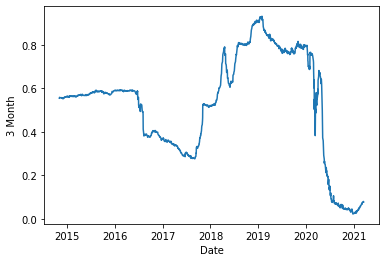

In [5]:
sns.lineplot(data=libor_wide['3 Month'])

In [6]:
libor_wide['3 Month'].describe()

count    1606.000000
mean        0.526891
std         0.238989
min         0.023250
25%         0.362077
50%         0.570250
75%         0.753848
max         0.930880
Name: 3 Month, dtype: float64

In [7]:
# Source https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIxSUx&FromSeries=1&ToSeries=50&DAT=RNG&FD=1&FM=Jan&FY=2011&TD=18&TM=Mar&TY=2021&FNY=&CSVF=TT&html.x=223&html.y=22&C=5JK&Filter=N
sonia = pd.read_csv('sonia.csv', parse_dates=['Date'], dayfirst=True)
sonia

,Date,Sonia Overnight Rate
0,2021-03-16,0.0493
1,2021-03-15,0.0497
2,2021-03-12,0.0490
3,2021-03-11,0.0485
4,2021-03-10,0.0485
...,...,...
2574,2011-01-10,0.5081
2575,2011-01-07,0.5069
2576,2011-01-06,0.5052
2577,2011-01-05,0.5071


In [8]:
sonia.sort_values(by='Date', inplace=True)
sonia['Sonia 7 Day Average'] = sonia['Sonia Overnight Rate'].rolling(7).mean()
sonia['Sonia 30 Day Average'] = sonia['Sonia Overnight Rate'].rolling(30).mean()
sonia['Sonia 60 Day Average'] = sonia['Sonia Overnight Rate'].rolling(60).mean()
sonia['Sonia 90 Day Average'] = sonia['Sonia Overnight Rate'].rolling(90).mean()
sonia['Sonia 180 Day Average'] = sonia['Sonia Overnight Rate'].rolling(180).mean()
sonia['Sonia 360 Day Average'] = sonia['Sonia Overnight Rate'].rolling(360).mean()
sonia


,Date,Sonia Overnight Rate,Sonia 7 Day Average,Sonia 30 Day Average,Sonia 60 Day Average,Sonia 90 Day Average,Sonia 180 Day Average,Sonia 360 Day Average
2578,2011-01-04,0.5110,NaN,NaN,NaN,NaN,NaN,NaN
2577,2011-01-05,0.5071,NaN,NaN,NaN,NaN,NaN,NaN
2576,2011-01-06,0.5052,NaN,NaN,NaN,NaN,NaN,NaN
2575,2011-01-07,0.5069,NaN,NaN,NaN,NaN,NaN,NaN
2574,2011-01-10,0.5081,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4,2021-03-10,0.0485,0.048986,0.048860,0.048690,0.050120,0.053258,0.254189
3,2021-03-11,0.0485,0.048900,0.048853,0.048675,0.050060,0.053176,0.252349
2,2021-03-12,0.0490,0.048900,0.048723,0.048673,0.050012,0.053104,0.250508
1,2021-03-15,0.0497,0.048943,0.048780,0.048705,0.049968,0.053046,0.248672


<AxesSubplot:xlabel='Date'>

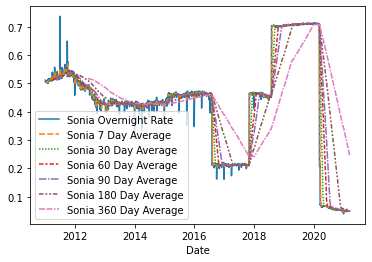

In [9]:
sns.lineplot(data=sonia.set_index('Date'))

In [10]:
interest_rates = libor_wide.merge(sonia, how = 'inner', on = 'Date').set_index('Date')
interest_rates

,1 Month,1 Week,1 Year,2 Month,3 Month,6 Month,Overnight,Sonia Overnight Rate,Sonia 7 Day Average,Sonia 30 Day Average,Sonia 60 Day Average,Sonia 90 Day Average,Sonia 180 Day Average,Sonia 360 Day Average
Date,,,,,,,,,,,,,,
2014-11-03,0.50663,0.47938,1.01213,0.52900,0.55475,0.69275,0.46813,0.4345,0.431557,0.431980,0.429215,0.428126,0.424627,0.426295
2014-11-04,0.50788,0.47938,1.01369,0.52900,0.55738,0.69531,0.46813,0.4344,0.432500,0.431720,0.429358,0.428722,0.424754,0.426343
2014-11-05,0.50788,0.47938,1.01338,0.52650,0.55838,0.69375,0.46750,0.4327,0.432471,0.431417,0.429550,0.428700,0.424861,0.426366
2014-11-06,0.50850,0.48000,1.01463,0.52963,0.55838,0.69375,0.46813,0.4341,0.432229,0.431620,0.429767,0.428667,0.424972,0.426400
2014-11-07,0.50663,0.48000,1.01463,0.52838,0.55713,0.69219,0.46813,0.4358,0.432457,0.431107,0.430058,0.428809,0.425060,0.426441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-10,0.04738,0.04613,0.15400,0.06288,0.07725,0.09563,0.04025,0.0485,0.048986,0.048860,0.048690,0.050120,0.053258,0.254189
2021-03-11,0.04775,0.04588,0.15313,0.06463,0.07875,0.09963,0.04025,0.0485,0.048900,0.048853,0.048675,0.050060,0.053176,0.252349
2021-03-12,0.05050,0.04525,0.15388,0.06600,0.07950,0.10163,0.03963,0.0490,0.048900,0.048723,0.048673,0.050012,0.053104,0.250508


In [11]:
sonia_libor_differential = interest_rates.copy()

for column in sonia_libor_differential:
    if column == 'Overnight':
        sonia_libor_differential[column] -= sonia_libor_differential['Sonia Overnight Rate']
        sonia_libor_differential.drop(columns='Sonia Overnight Rate', inplace=True)
    elif column == '1 Week':
        sonia_libor_differential[column] -= sonia_libor_differential['Sonia 7 Day Average']
        sonia_libor_differential.drop(columns='Sonia 7 Day Average', inplace=True)
    elif column == '1 Month':
        sonia_libor_differential[column] -= sonia_libor_differential['Sonia 30 Day Average']
        sonia_libor_differential.drop(columns='Sonia 30 Day Average', inplace=True)
    elif column == '2 Month':                        
        sonia_libor_differential[column] -= sonia_libor_differential['Sonia 60 Day Average']
        sonia_libor_differential.drop(columns='Sonia 60 Day Average', inplace=True)
    elif column == '3 Month':                      
        sonia_libor_differential[column] -= sonia_libor_differential['Sonia 90 Day Average']
        sonia_libor_differential.drop(columns='Sonia 90 Day Average', inplace=True)
    elif column == '6 Month':                      
        sonia_libor_differential[column] -= sonia_libor_differential['Sonia 180 Day Average']
        sonia_libor_differential.drop(columns='Sonia 180 Day Average', inplace=True)
    elif column == '1 Year':                      
        sonia_libor_differential[column] -= sonia_libor_differential['Sonia 360 Day Average']
        sonia_libor_differential.drop(columns='Sonia 360 Day Average', inplace=True)                    
    
five_year_adjustment_spreads = sonia_libor_differential[sonia_libor_differential.index > np.datetime64('2014-03-16')]
five_year_adjustment_spreads

,1 Month,1 Week,1 Year,2 Month,3 Month,6 Month,Overnight
Date,,,,,,,
2014-11-03,0.074650,0.047823,0.585835,0.099785,0.126624,0.268123,0.03363
2014-11-04,0.076160,0.046880,0.587347,0.099642,0.128658,0.270556,0.03373
2014-11-05,0.076463,0.046909,0.587014,0.096950,0.129680,0.268889,0.03480
2014-11-06,0.076880,0.047771,0.588230,0.099863,0.129713,0.268778,0.03403
2014-11-07,0.075523,0.047543,0.588189,0.098322,0.128321,0.267130,0.03233
...,...,...,...,...,...,...,...
2021-03-10,-0.001480,-0.002856,-0.100189,0.014190,0.027130,0.042372,-0.00825
2021-03-11,-0.001103,-0.003020,-0.099219,0.015955,0.028690,0.046454,-0.00825
2021-03-12,0.001777,-0.003650,-0.096628,0.017327,0.029488,0.048526,-0.00937


In [12]:
five_year_adjustment_spreads.describe()

,1 Month,1 Week,1 Year,2 Month,3 Month,6 Month,Overnight
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,0.031869,0.013106,0.381606,0.066646,0.107194,0.207472,0.001474
std,0.057192,0.032877,0.279916,0.067556,0.087856,0.155647,0.023055
min,-0.432550,-0.424699,-0.331782,-0.423110,-0.322144,-0.269025,-0.130070
25%,0.012391,-0.006715,0.278905,0.042200,0.063716,0.123203,-0.011600
50%,0.040058,0.022027,0.489454,0.077384,0.122688,0.251684,0.009550
75%,0.050223,0.027909,0.584119,0.092266,0.142482,0.294000,0.017950
max,0.270813,0.206000,0.770643,0.290125,0.349227,0.530855,0.140880


In [13]:
five_year_adjustment_spread = pd.DataFrame(five_year_adjustment_spreads.mean(), index=['Overnight', '1 Week', '1 Month', '2 Month', '3 Month', '6 Month', '1 Year'])
five_year_adjustment_spread.columns = ['Adjustment Spread']
five_year_adjustment_spread

,Adjustment Spread
Overnight,0.001474
1 Week,0.013106
1 Month,0.031869
2 Month,0.066646
3 Month,0.107194
6 Month,0.207472
1 Year,0.381606
